<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP1/Trabajo_pr%C3%A1ctico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico 1

En este trabajo se propone como ejercicio poder abrir una imagen, poder cambiar los colores de sus pixels y poder guardar la imagen como archivo.

In [1]:
from matplotlib import image, pyplot
import imageio

Leemos la imagen:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

image = imageio.imread('/content/drive/MyDrive/Imagenes PDI/cat.jpg')

Mounted at /content/drive


Obtenemos el tipo, tamaño y componente de la imagen

In [7]:
print('tipo de imagen:', image.dtype)
print('tamaño de imagen:', image.shape)
[xs,ys,zs]=image.shape
image

tipo de imagen: uint8
tamaño de imagen: (630, 1200, 3)


Array([[[21, 23, 22],
        [ 9, 11, 10],
        [10, 12, 11],
        ...,
        [18, 10,  7],
        [18, 10,  7],
        [18, 10,  7]],

       [[21, 23, 22],
        [ 8, 10,  9],
        [10, 12, 11],
        ...,
        [18, 10,  7],
        [18, 10,  7],
        [18, 10,  7]],

       [[21, 23, 22],
        [ 8, 10,  9],
        [10, 12, 11],
        ...,
        [18, 10,  7],
        [18, 10,  7],
        [18, 10,  7]],

       ...,

       [[22, 27, 31],
        [ 9, 14, 18],
        [ 9, 14, 18],
        ...,
        [15, 20, 24],
        [16, 21, 25],
        [17, 22, 26]],

       [[22, 27, 31],
        [ 9, 14, 18],
        [ 9, 14, 18],
        ...,
        [ 8, 13, 17],
        [10, 15, 19],
        [11, 16, 20]],

       [[22, 27, 31],
        [ 9, 14, 18],
        [ 9, 14, 18],
        ...,
        [10, 15, 19],
        [10, 15, 19],
        [11, 16, 20]]], dtype=uint8)

Ploteamos la imagen

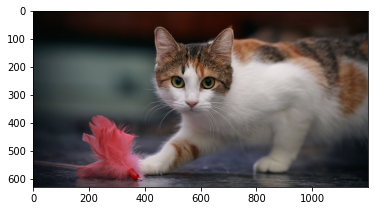

In [8]:
pyplot.imshow(image)
pyplot.show()

vamos a obtener los valores de R, G y B para todos los pixeles de la imagen 

In [14]:
Rtot = image[:, :, 0]
Gtot = image[:, :, 1]
Btot = image[:, :, 2]

Ahora escribimos un código que nos permite obtener los valores de RGB para un pixel a elección de la imagen. Para agregar interacción con el usario, vamos a pedirle que elija las coordenadas en donde calcular los valores de RGB:

In [11]:
x= int(input('Seleccione la coordenada x'))
y= int(input('Seleccione la coordenada y'))
coordenadas = [x,y]

Seleccione la coordenada x56
Seleccione la coordenada y75


Imprimo en pantalla las coordenadas que eligió el usuario para el pixel, y también los valores R, G y B de dicho pixel.

In [13]:
print('valor de RGB para el pixel', coordenadas ,'de la imagen')
print('R={}'.format(image[x, y, 0]))
print('G={}'.format(image[x, y, 1]))
print('B={}'.format(image[x, y, 2]))

valor de RGB para el pixel [56, 75] de la imagen
R=6
G=6
B=4


Ahora vamos a crear un código que nos permita graficar un único canal de la imagen. El canal a graficar va a ser el que desee el usuario. Puede elegir el canal R, G o B.

Seleccione un canal R, G o B para graficarR


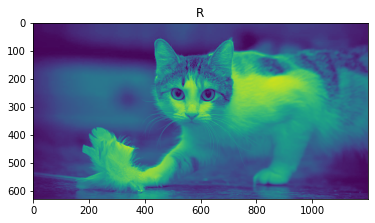

In [ ]:
channel = input('Seleccione un canal R, G o B para graficar')
pyplot.title(channel)

if channel == 'R':
    pyplot.imshow(image[ : , : , 0])
    pyplot.show()
elif channel == 'G':
    pyplot.imshow(image[ : , : , 1])
    pyplot.show()
elif channel == 'B':
    pyplot.imshow(image[ : , : , 2])
    pyplot.show()
else: 
    print('Ingrese como opción R, G o B') #Si no elige R G o B, el código le va a volver indicar que esas eran las únicas opciones posibles.

Ahora, hacemos una sección del código que nos permite cambiar el valor de un pixel o una región de pixeles de la imagen por otro color. Nuevamente, el pixel/región de pixeles, y el color final queda a elección del usuario.

A continuación debe seleccionar los rangos en x e y donde desea modificar el color de los pixeles
Seleccione valor inicial en x255
Seleccione valor final en x260
Seleccione valor inicial en y300
Seleccione valor final en y340


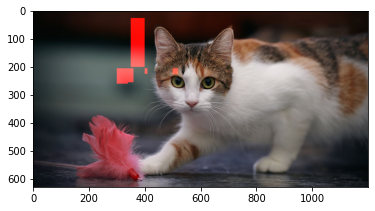

In [ ]:
print('A continuación debe seleccionar los rangos en x e y donde desea modificar el color de los pixeles')
a= int(input('Seleccione valor inicial en x'))
b= int(input('Seleccione valor final en x'))

c= int(input('Seleccione valor inicial en y'))
d= int(input('Seleccione valor final en y'))

image[a:b , c:d , 0] = 255 # selecciono el pixel/rango de pixeles al cual le asigno el color
pyplot.imshow(image)
pyplot.savefig('/content/drive/MyDrive/Imagenes PDI/cat_edit.jpg') #guardo la imagen editada
pyplot.show()

#Conclusiones

En primer lugar, podemos ver que al graficar los distintos canales de la imagen, R, G y B, vemos que la información principal de la imagen no se pierde en ninguno. Es decir, a pesar de que solo estamos trabajando con $\frac{1}{3}$ de la información total de la imagen, igualmente es posible observar con claridad lo que está representada en la misma. 

Por otro lado, al editar los píxeles de la imagen, vemos que en el caso de editar un único pixel de la imagen no es posible, para el ojo humano, detectar cambio alguno. 

Si en el código presentado, indicamos valores para modificar el color de un único pixel, y luego uno intenta descubrir las coordenadas (x,y) de ese pixel, es muy probable que no lo logre. 
Sin embargo, cuando nosotros programamos un código para detectar los valores de los canales R, G y B en un pixel, la computadora puede detectarlo sin problema.
Esto nos hace pensar, ¿qué tan necesario es trabajar con imágenes con tanta definición, es decir una cantidad alta de pixeles de ancho, por pixeles de alto, si el ojo humano no distingue cambios tan pequeños?

La respuesta a esto depende de para qué se va a utilizar la imagen en cuestión. Si se va a ver una imagen pequeña, entonces no es necesario tener tanta información, ya que la misma solo vuelve más lento todo el procesamiento. Sin embargo, si estamos pensando en realizar un póster tamaño gigante, entonces sí puede ser beneficioso tener la imagen en alta calidad.

